In [ ]:
cd /content/drive/MyDrive/NLP project

/content/drive/MyDrive/NLP project


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 21.1 MB/s eta 0:00:00


In [ ]:
import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras 
from keras import backend as K
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM,Dense,Bidirectional,Input
from keras.models import Model
import torch
import transformers

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP project/IMDB Dataset SPANISH.csv")
df.head()

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [ ]:
df.describe()

,Unnamed: 0
count,50000.000000
mean,24999.500000
std,14433.901067
min,0.000000
25%,12499.750000
50%,24999.500000
75%,37499.250000
max,49999.000000


In [ ]:
df['sentiment'] = df['sentiment'].astype('category')

<Axes: xlabel='sentiment', ylabel='count'>

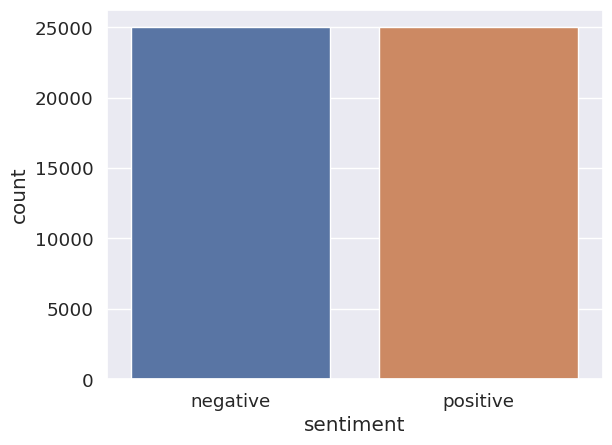

In [ ]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(x='sentiment', data=df)

**Experiment 1**

In [ ]:
df_e = pd.read_csv('IMDB Dataset SPANISH.csv', usecols=['review_es', 'sentimiento'])

In [ ]:
df_e.head()

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


In [ ]:
!pip install es_core_news_sm

NotImplementedError: ignored

In [ ]:
# Import the necessary libraries and load the 'es_core_news_sm' model using spaCy:
import spacy

nlp = spacy.load('es_core_news_sm')

/usr/local/lib/python3.9/dist-packages/spacy/util.py:887: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.5.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

#df_es['review_lemmatized'] = df_es['review_es'][:10].apply(lemmatize_text)

df_es['review_lemmatized'] = df['review_es'].apply(lemmatize_text)

KeyboardInterrupt: ignored

<Axes: xlabel='sentiment', ylabel='count'>

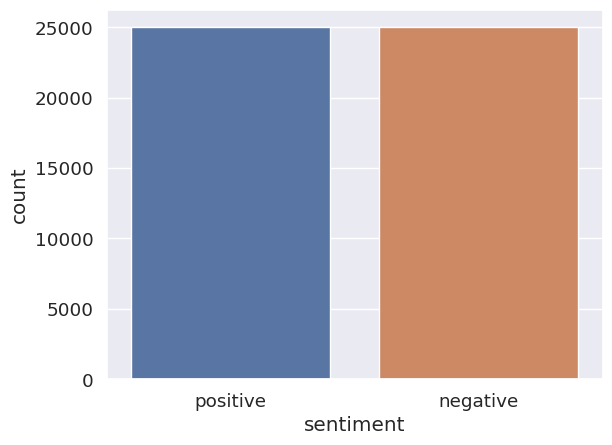

In [ ]:
import seaborn as sns

sns.countplot(x='sentiment', data=df_es)

**Experiment 3**

In [ ]:
import pandas as pd

In [ ]:
cd /content/drive/MyDrive/NLP project

/content/drive/MyDrive/NLP project


In [ ]:
#Load the Spanish dataset into a Pandas DataFrame:
df = pd.read_csv('IMDB Dataset SPANISH.csv')

In [ ]:
#Remove any unnecessary columns from the DataFrame:
df_es = df[['review_es', 'sentimiento']]

In [ ]:
df_es.head(2)

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo


In [ ]:
#Convert all text to lowercase:
df_es['review_es'] = df_es['review_es'].str.lower()

<ipython-input-13-9e7133070463>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_es['review_es'] = df_es['review_es'].str.lower()


In [ ]:
df_es.head(2)

,review_es,sentimiento
0,uno de los otros críticos ha mencionado que de...,positivo
1,una pequeña pequeña producción.la técnica de f...,positivo


In [ ]:
#Remove any punctuation and special characters from the text:
df_es['review_es'] = df_es['review_es'].str.replace('[^\w\s]', '')

<ipython-input-15-f4fe7e18795b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_es['review_es'] = df_es['review_es'].str.replace('[^\w\s]', '')
<ipython-input-15-f4fe7e18795b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_es['review_es'] = df_es['review_es'].str.replace('[^\w\s]', '')


In [ ]:
df_es.head(2)

,review_es,sentimiento
0,uno de los otros críticos ha mencionado que de...,positivo
1,una pequeña pequeña producciónla técnica de fi...,positivo


In [ ]:
pip install es-core-news-sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 668.8/668.8 KB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 110.1 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.7
    Uninstalling pydantic-1.10.7:
      Successfully uninstalled pydantic-1.10.7
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.9
    Uninstalling thinc-8.1.9:
      Succe

In [ ]:
#remove punctuations
import string

df_es['review_es'] = df_es['review_es'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


<ipython-input-18-0ffa8a998dc8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_es['review_es'] = df_es['review_es'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


In [ ]:
df_es.head(2)

,review_es,sentimiento
0,uno de los otros críticos ha mencionado que de...,positivo
1,una pequeña pequeña producciónla técnica de fi...,positivo


In [ ]:
# remove multiple periods
import re

df_es['review_es'] = df_es['review_es'].apply(lambda x: re.sub(r'\.{2,}', ' ', x))


<ipython-input-20-46d10f47a1bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_es['review_es'] = df_es['review_es'].apply(lambda x: re.sub(r'\.{2,}', ' ', x))


In [ ]:
df_es.head(2)

,review_es,sentimiento
0,uno de los otros críticos ha mencionado que de...,positivo
1,una pequeña pequeña producciónla técnica de fi...,positivo


In [ ]:
#remove numbers
df_es['review_es'] = df_es['review_es'].str.replace('\d+', '')

<ipython-input-22-1ef7047b5545>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_es['review_es'] = df_es['review_es'].str.replace('\d+', '')
<ipython-input-22-1ef7047b5545>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_es['review_es'] = df_es['review_es'].str.replace('\d+', '')


In [ ]:
df_es.head(2)

,review_es,sentimiento
0,uno de los otros críticos ha mencionado que de...,positivo
1,una pequeña pequeña producciónla técnica de fi...,positivo


In [ ]:
# Import the necessary libraries and load the 'es_core_news_sm' model using spaCy:
import spacy

nlp = spacy.load('es_core_news_sm')

In [ ]:
# tokenize the text
df_es['review_es'] = df_es['review_es'].apply(lambda x: ' '.join([token.text for token in nlp(str(x))]))


<ipython-input-25-be9709e2cc37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_es['review_es'] = df_es['review_es'].apply(lambda x: ' '.join([token.text for token in nlp(str(x))]))


In [ ]:
df_es.head(2)

,review_es,sentimiento
0,uno de los otros críticos ha mencionado que de...,positivo
1,una pequeña pequeña producciónla técnica de fi...,positivo


In [ ]:
#Remove any stopwords from the text:
stopwords = spacy.lang.es.stop_words.STOP_WORDS

df_es['review_es'] = df_es['review_es'].apply(lambda x: ' '.join([token.text for token in nlp(x) if not token.is_stop]))


<ipython-input-27-8aa96b1966c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_es['review_es'] = df_es['review_es'].apply(lambda x: ' '.join([token.text for token in nlp(x) if not token.is_stop]))


In [ ]:
df_es.head(2)

,review_es,sentimiento
0,"[ ' críticos ' , ' mencionado ' , ' oz ' , ' e...",positivo
1,"[ ' pequeña ' , ' pequeña ' , ' producciónla '...",positivo


In [ ]:
pip install spellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 82.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966516 sha256=3aa694dc25458aaa6ee18a5f7ddbe8767aca90d734c194638cd4baee01776bd6
  Stored in directory: /root/.cache/pip/wheels/8c/52/b3/8795c86fe999a3b1a7d0f1b75a197fd984e37057cb537e2977
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7141 sha256=047e340a3e8643c4cdc25a2f727b13cfef576bd2f3b9e0dd5722d7fca75ab60a
  Stored in directory: /root/.cache/pip/wheels/da/15/83/b2b0adf6ebb17b0c7b8de4a901f0585ceb7627788a80071de0
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8480 sha256=8e120f569e4cb0d36d57e8ed7

In [ ]:
pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 65.0 MB/s eta 0:00:00


In [ ]:
#drop any none values
df_es = df_es.dropna(subset=['review_es'])

In [ ]:
def correct_spelling(text):
    corrected_text = []
    for word in text.split():
        if word is not None:
            corrected_word = spell.correction(word)
            if corrected_word is not None:
                corrected_text.append(corrected_word)
    return ' '.join(corrected_text)

In [ ]:
# Drop rows with missing values in 'review_es' column
df_es.dropna(subset=['review_es'], inplace=True)

# Spelling checker
from spellchecker import SpellChecker

spell = SpellChecker(language='es')

def correct_spelling(text):
    corrected_text = []
    for word in text.split():
        if word is not None:
            corrected_text.append(spell.correction(word))
    return ' '.join(corrected_text)

# Fill missing values with an empty string
df_es['review_es'].fillna('', inplace=True)

# Apply spelling correction function
df_es['review_es'] = df_es['review_es'].apply(correct_spelling)

TypeError: ignored

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker(language='es')

def correct_spelling(text):
    corrected_text = []
    for word in text.split():
        corrected_word = spell.correction(word)
        if corrected_word != word:
            print(f'Original word: {word}, Corrected word: {corrected_word}')
        corrected_text.append(corrected_word)
    return ' '.join(corrected_text)

df_es['review_es'] = df_es['review_es'].apply(correct_spelling)

Original word: episodio,, Corrected word: episodio
Original word: enganchado., Corrected word: enganchado
Original word: razón,, Corrected word: razón
Original word: conmigo., Corrected word: conmigo
Original word: inconfiadas,, Corrected word: None
Original word: palabra., Corrected word: palabra
Original word: mí,, Corrected word: mí
Original word: tímido., Corrected word: tímido
Original word: drogas,, Corrected word: drogas
Original word: violencia., Corrected word: violencia
Original word: hardcore,, Corrected word: hardcore
Original word: palabra., Corrected word: palabra
Original word: oz,, Corrected word: oz
Original word: oswald., Corrected word: oswald
Original word: emeralda,, Corrected word: esmeralda
Original word: adentro,, Corrected word: adentro
Original word: agenda., Corrected word: agenda
Original word: ..., Corrected word: None
Original word: fariarios,, Corrected word: None
Original word: musulmanes,, Corrected word: musulmanes
Original word: gangstas,, Corrected w

TypeError: ignored

In [ ]:
df_es.head(2)

,review_es,sentimiento
0,[,positivo
1,[,positivo


In [ ]:
negation_words = ['no', 'ni', 'nunca', 'jamás', 'tampoco', 'ninguno']

def handle_negation(text):
    negation_flag = False
    words = text.split()
    for i in range(len(words)):
        if negation_flag:
            words[i] = 'NOT_' + words[i]
        if words[i].lower() in negation_words:
            negation_flag = not negation_flag
        if 'NOT_' in words[i]:
            negation_flag = False
    return ' '.join(words)

df_es['review_es'] = df_es['review_es'].apply(handle_negation)

In [ ]:
df_es.head(2)

,review_es,sentimiento
0,uno de los otros críticos ha mencionado que de...,positivo
1,una pequeña pequeña producción.la técnica de f...,positivo


**Englisg Translation**
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and uncompromising scenes of violence, which set the tone for the show. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches regarding drugs, sex or violence. It is hardcore, in the truest sense of the word. It is called Oz as that is the nickname given to the Oswald State Penitentiary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many ... murderers, rapists, gangsters, Latinos, Christians, Italians, Irish and more... so screeching and catcalling are commonplace. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for the mainstream audience, forget charm, forget romance...Oz doesn't go down that road. The first episode I ever saw struck me as so nasty and surreal that I thought I was dreaming it. But such realism and honesty is essential to prevent this show from slipping into a quagmire of boredom. It is very easy to overlook the subtlety of the show's message in its presentation of violence and drugs. The tagline is "It's no fairy tale", and it makes no mistake about that. Violence begets violence, and the repercussions of both guards and inmates actions affect everyone from governors to friends and family. Oz is NOT a show for the faint-hearted or for those who lack intestinal fortitude. It is brutal and portrays life as it really is in an American maximum-security prison. It may not make for happy viewing but it is compelling viewing.

In [ ]:

# Create set of all Spanish words in the vocabulary
spanish_vocab = set([word.text.lower() for word in nlp.vocab if not word.is_stop])

# Function to count the number of unknown words in a text
def count_unknown_words(text):
    doc = nlp(text)
    unknown_words = [word.text.lower() for word in doc if not word.is_stop and word.text.lower() not in spanish_vocab]
    return len(unknown_words)

# Apply function to "review_es" column
df_es["unknown_words"] = df_es["review_es"].apply(count_unknown_words)

# Calculate total number of unknown words in "review_es" column
total_unknown_words = df_es["unknown_words"].sum()

print(f"Total number of unknown words in 'review_es' column: {total_unknown_words}")


KeyboardInterrupt: ignored

In [ ]:
#Lemmatize the text:
df_es['review_es'] = df_es['review_es'].apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))


In [ ]:
#Save the preprocessed data to a new CSV file:
df_es.to_csv('lemmatized_spanish_dataset.csv', index=False)


In [ ]:
# Part-of-speech tagging
df_es['review_es_pos'] = df_es['review_es'].apply(lambda x: [(token.text, token.pos_) for token in nlp(x)])
#print(token.text, token.pos_, token.tag_, token.dep_, token.ent_type_)

NameError: ignored

In [ ]:
# Named entity recognition
df_es['review_es'] = df_es['review_es'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])

NameError: ignored

In [ ]:
#Final product
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from spacy import displacy
from spellchecker import SpellChecker
import re

nlp = spacy.load('es_core_news_sm')
spell = SpellChecker(language='es')

def preprocess_text(text):
    # Remove multiple periods
    text = re.sub('\.{2,}', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub('\d+', '', text)
    # Remove punctuation
    text = re.sub('[^\w\s]', '', text)
    # Remove stopwords
    text = ' '.join([token.text for token in nlp(text) if not token.is_stop])
    # Apply spell checking and correction
    corrected_tokens = []
    for token in nlp(text):
        if spell.unknown([token.text]):
            corrected_tokens.append(spell.correction(token.text))
        else:
            corrected_tokens.append(token.text)
    text = ' '.join(corrected_tokens)
    # Handle negation
    text = re.sub(r'\bno\b(\s+\w+)', r'not_\1', text)
    # Lemmatize text
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

df['review_es_processed'] = df['review_es'].apply(preprocess_text)

In [ ]:
#Word frequency analysis
import spacy
from collections import Counter
nlp = spacy.load('es_core_news_sm')

# Tokenize text into individual words and remove stop words, punctuations, and numbers
def preprocess(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.like_num]

# Apply the preprocessing function to the 'review_es' column of the dataframe
df_es['review_processed'] = df_es['review_es'].apply(preprocess)

# Flatten the list of processed words into a single list
words = [word for review in df_es['review_processed'] for word in review]

# Count the frequency of each word and create a dictionary of the top 20 most common words
word_freq = dict(Counter(words).most_common(20))

# Visualize the top 20 most common words using a bar chart
import matplotlib.pyplot as plt
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Top 20 most common words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Visualize the distribution of sentiment scores using a histogram
import seaborn as sns
sns.histplot(df_es, x='sentimiento')
plt.title('Distribution of sentiment scores')
plt.xlabel('Sentiment score')
plt.ylabel('Count')
plt.show()

In [ ]:
#We can use Latent Dirichlet Allocation (LDA) to identify the underlying topics and themes present in the reviews. 
#First, we need to convert the text data into a document-term matrix using CountVectorizer. We can then fit an LDA model to the document-term matrix and visualize the topics using pyLDAvis.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn

# Convert the 'review_es' column into a document-term matrix
vectorizer = CountVectorizer(tokenizer=preprocess)
doc_term_matrix = vectorizer.fit_transform(df_es['review_es'])

# Fit an LDA model to the document-term matrix
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Visualize the topics using pyLDAvis
pyLDAvis.sklearn.prepare(lda_model, doc_term_matrix, vectorizer)

In [ ]:
#Word clouds

from wordcloud import WordCloud

# Concatenate all the reviews into a single string
text = ' '.join(df_es['review_es'])

# Create a WordCloud object and visualize it
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set()).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a CountVectorizer object to extract big

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2,2))

# Fit and transform the review_es column
reviews_bigram = vectorizer.fit_transform(df_es['review_es'])

# Get the feature names (bigrams)
feature_names = vectorizer.get_feature_names()

# Calculate the frequency of each bigram
bigram_freq = reviews_bigram.sum(axis=0)

# Create a dictionary of bigrams and their frequencies
bigram_dict = dict(zip(feature_names, bigram_freq.tolist()[0]))

# Sort the dictionary by frequency in descending order
sorted_bigrams = sorted(bigram_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top 20 bigrams
print(sorted_bigrams[:20])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create CountVectorizer object and fit it to the preprocessed text data
vectorizer = CountVectorizer(stop_words='spanish')
vectorized_text = vectorizer.fit_transform(df_es['review_es'])

# Train LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(vectorized_text)

# Calculate perplexity
perplexity = lda_model.perplexity(vectorized_text)
print(f"Perplexity of the LDA model: {perplexity}")